In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle

import sys
sys.path.append('..')

import src as odyn

# 100 Agent Model

#### Model Parameter Selection

Place 100 agents on grid with weights and beliefs.

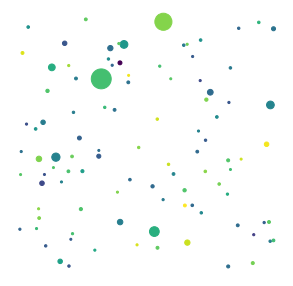

In [2]:
gamma = 1.5
p = [.5, .5]
lam = 1/2
b = 1.5

agent_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_square_networks/agent_df.csv", index_col = 0)
belief_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_square_networks/belief_df.csv", index_col = 0)

# Plot Agents
fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(x = agent_df["x"], 
            y = agent_df["y"],  
            s = (belief_df["weight"] + 1) ** 2,
            c = belief_df["belief"],
            cmap = "viridis")
ax.set_axis_off()
plt.show()

Grid search for alpha and delta parameters.

In [3]:
cc_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_model/grid_search_alpha_delta/clustering_coefficient.csv", index_col = 0)
cc_df

,0,1,2,3,4,5,6,7,8,9
0,0.869503,0.706540,0.726561,0.743751,0.766171,0.779246,0.787674,0.797357,0.803152,0.812331
1,0.512081,0.611473,0.679396,0.713807,0.739707,0.763583,0.775359,0.786257,0.803112,0.809393
2,0.327719,0.547285,0.667828,0.707275,0.736922,0.754925,0.780268,0.793757,0.793231,0.808627
3,0.227116,0.462563,0.658134,0.713110,0.737300,0.750808,0.759636,0.782022,0.793941,0.806013
4,0.155919,0.370339,0.628237,0.714071,0.738691,0.745419,0.770726,0.769837,0.782847,0.795300
5,0.138725,0.325884,0.595449,0.691216,0.730281,0.760992,0.757705,0.775043,0.776258,0.774876
6,0.115361,0.217122,0.526593,0.680751,0.739176,0.748447,0.765889,0.775325,0.783308,0.784653
7,0.066657,0.219080,0.459368,0.610655,0.723415,0.758650,0.763726,0.776451,0.782352,0.784699
8,0.068476,0.136524,0.420541,0.579127,0.727260,0.738768,0.767564,0.775405,0.777515,0.781827
9,0.027500,0.101000,0.372115,0.544039,0.653913,0.714459,0.749608,0.778317,0.781845,0.785823


In [4]:
md_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_model/grid_search_alpha_delta/mean_degree.csv", index_col = 0)
md_df

,0,1,2,3,4,5,6,7,8,9
0,61.08,35.66,28.63,25.57,23.83,22.29,21.79,21.21,20.69,20.40
1,35.12,25.55,22.79,21.04,20.13,19.58,19.32,18.73,18.76,18.36
2,21.51,19.07,18.26,18.26,17.89,17.83,17.45,17.32,17.51,17.26
3,12.85,13.55,15.28,15.99,15.78,16.02,16.24,16.20,16.47,16.52
4,8.48,9.17,12.60,13.85,14.35,15.08,15.04,15.47,15.44,15.72
5,5.83,6.68,9.92,12.06,13.24,13.75,14.22,14.49,14.76,14.86
6,4.42,4.74,7.87,10.51,12.01,12.89,13.61,13.74,14.16,14.33
7,3.34,4.02,6.12,9.19,10.67,11.57,12.77,13.29,13.64,13.85
8,2.62,2.82,4.97,7.49,9.55,10.99,11.66,12.55,13.12,13.37
9,1.86,1.99,4.05,6.57,8.33,10.08,10.94,11.89,12.35,12.91


Initialize 100 agent models with optimal choice of alpha and delta as obtained from grid search above.

In [5]:
alpha = 1
delta = 6

opinion_model = odyn.OpinionNetworkModel(
                probabilities = p, 
                power_law_exponent = gamma,
                openness_to_neighbors = b,
                openness_to_influencers = 1.5,
                distance_scaling_factor = lam,
                importance_of_weight = alpha, 
                importance_of_distance = delta,
                include_opinion = True,
                include_weight = False,
                include_distance = False
                           )

weight_model = odyn.OpinionNetworkModel(
                probabilities = p, 
                power_law_exponent = gamma,
                openness_to_neighbors = b,
                openness_to_influencers = 1.5,
                distance_scaling_factor = lam,
                importance_of_weight = alpha, 
                importance_of_distance = delta,
                include_opinion = False,
                include_weight = True,
                include_distance = False
                           )

distance_model = odyn.OpinionNetworkModel(
                probabilities = p, 
                power_law_exponent = gamma,
                openness_to_neighbors = b,
                openness_to_influencers = 1.5,
                distance_scaling_factor = lam,
                importance_of_weight = alpha, 
                importance_of_distance = delta,
                include_opinion = False,
                include_weight = False,
                include_distance = True
                           )

full_model = odyn.OpinionNetworkModel(
                probabilities = p, 
                power_law_exponent = gamma,
                openness_to_neighbors = b,
                openness_to_influencers = 1.5,
                distance_scaling_factor = lam,
                importance_of_weight = alpha, 
                importance_of_distance = delta,
                include_opinion = True,
                include_weight = True,
                include_distance = True
                           )

Add adjacencies to models.

In [6]:
full_model.agent_df = agent_df
full_model.belief_df = belief_df

full_model.adjacency_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_square_networks/full_model_adjacency_df.csv", index_col = 0)
full_model.adjacency_df.rename(columns = {c:int(c) for c in full_model.adjacency_df.columns}, inplace = True)

In [7]:
opinion_model.agent_df = agent_df
opinion_model.belief_df = belief_df

opinion_model.adjacency_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_square_networks/opinion_model_adjacency_df.csv", index_col = 0)
opinion_model.adjacency_df.rename(columns = {c:int(c) for c in opinion_model.adjacency_df.columns}, inplace = True)

In [8]:
weight_model.agent_df = agent_df
weight_model.belief_df = belief_df

weight_model.adjacency_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_square_networks/weight_model_adjacency_df.csv", index_col = 0)
weight_model.adjacency_df.rename(columns = {c:int(c) for c in weight_model.adjacency_df.columns}, inplace = True)

In [9]:
distance_model.agent_df = agent_df
distance_model.belief_df = belief_df

distance_model.adjacency_df = pd.read_csv("../data/simulation_results_from_paper/100_agent_square_networks/distance_model_adjacency_df.csv", index_col = 0)
distance_model.adjacency_df.rename(columns = {c:int(c) for c in distance_model.adjacency_df.columns}, inplace = True)

Create plots.

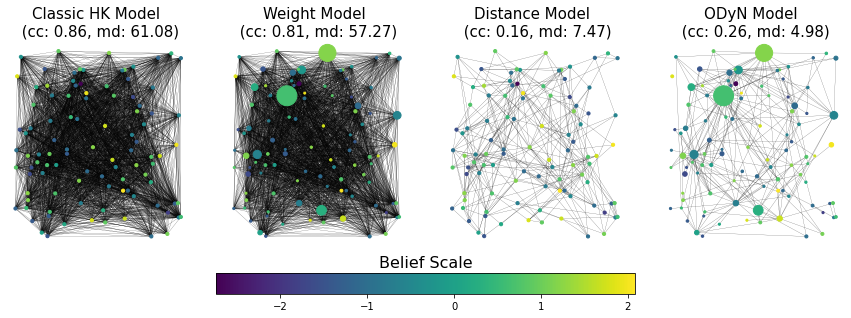

In [10]:
fig, ax = plt.subplots(1,4, figsize = (15,5), sharex = True, sharey = True)

x = belief_df["x"]
y = belief_df["y"]
size = (belief_df["weight"] + 1) ** 2
color = belief_df["belief"]

models = [opinion_model, weight_model, distance_model, full_model]
model_names = ["Classic HK Model","Weight Model", "Distance Model","ODyN Model"]
for i in range(len(models)):
    
    size = (belief_df["weight"] + 1) ** 2
    if i == 0:
        size = np.ones_like(belief_df["weight"].values) * 10
    if i == 2:
        size = np.ones_like(belief_df["weight"].values) * 10
    model = models[i]
    
    belief_df = model.belief_df
    adjacency_df = model.adjacency_df
    adjacency_df.rename(columns = {c:int(c) for c in adjacency_df.columns}, inplace = True)
    cc, md = model.compute_network_stats(adjacency_df)
    
    cc = str(cc).split(".")[0] + "." + str(cc).split(".")[1][:2]
    md = str(md).split(".")[0] + "." + str(md).split(".")[1][:2]

    # Draw edges
    for j in belief_df.index:
        for k in adjacency_df.loc[j,j:][adjacency_df.loc[j,j:] == 1].index:
            ax[i].plot((belief_df.loc[j,"x"], belief_df.loc[k,"x"]),
                            (belief_df.loc[j,"y"], belief_df.loc[k,"y"]),                            
                            color = "k", lw = .15, zorder = 0)

    # Draw vertices
    ax[i].scatter(x,y, s = size, c = color, cmap = "viridis")     
    ax[i].set_title(f"{model_names[i]} \n (cc: {cc}, md: {md})", fontsize = 15)
    
    ax[i].set_axis_off()

## Legend and Annotation
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(belief_df["belief"].min(), belief_df["belief"].max())
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[:], 
                    shrink = .5, 
                    orientation = "horizontal", 
                    pad = 0.1,
                   ticks=[-2, -1, 0, 1, 2])
cbar.ax.set_title("Belief Scale", fontsize = 16)

plt.show()

#### Run Dynamic Simulations

Here we compare the full ODyN model with the classical Hegselmann-Krause model.

In [11]:
def make_comparison_plot(n_agents,reach, iteration):
    fig, ax = plt.subplots(1,2, figsize = (10,4), sharey = True)
    
    folder = f"../data/simulation_results_from_paper/{n_agents}_agent_model"
    df = pd.read_csv(f"{folder}/opinion_model_simulation/iteration_{iteration:03}_reach_{reach:03}_dynamic_belief_df.csv", index_col = 0)

    m = df.iloc[:,0].min()
    M = df.iloc[:,0].max()
    cmap_linspace = np.linspace(m, M, 100)
    colors = plt.cm.viridis(cmap_linspace)
    hfont = {'fontname':'DejaVu Sans'}

    for i in df.index:
        c = np.where(cmap_linspace <= df.iloc[i,0])[0][-1]
        ax[0].plot(df.loc[i,:], color = colors[c])
        ax[0].set_title("Classic HK Model", **hfont)
        ax[0].set_xlabel("Timesteps", **hfont)

    df = pd.read_csv(f"{folder}/full_model_simulation/iteration_{iteration:03}_reach_{reach:03}_dynamic_belief_df.csv", index_col = 0)
    for i in df.index:
        c = np.where(cmap_linspace <= df.iloc[i,0])[0][-1]
        ax[1].plot(df.loc[i,:], color = colors[c])
        ax[1].set_title("Full ODyN Model", **hfont)
        ax[1].set_xlabel("Timesteps", **hfont)
    
    n = df.shape[0]
    if reach == 0:
        m = "No"
    else:
        m = f"{reach}%"
        
    plt.suptitle(f"Simulation with {n} Agents and {m} Mega-Influencers", fontsize = 18,**hfont)
    fig.tight_layout()
    fig.subplots_adjust(top=.8)
    plt.show()

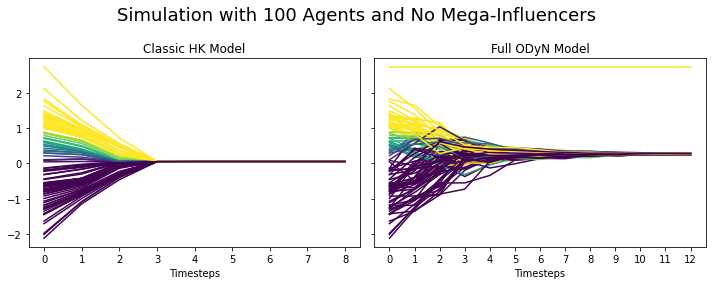

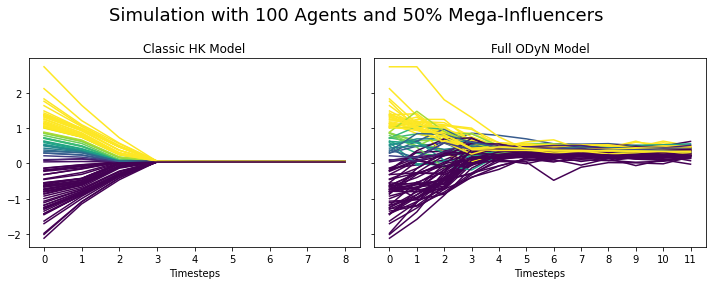

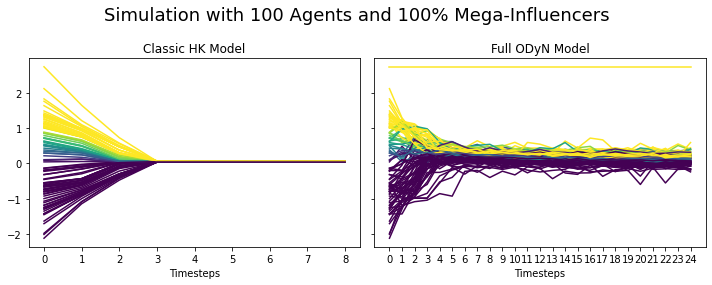

In [12]:
make_comparison_plot(n_agents = 100, reach = 0, iteration = 4)
make_comparison_plot(n_agents = 100, reach = 50, iteration = 4)
make_comparison_plot(n_agents = 100, reach = 100, iteration = 4)

In [13]:
full_stats_df = pd.read_csv(f"../data/simulation_results_from_paper/100_agent_model/full_model_stats.csv", index_col = 0)
opinion_stats_df = pd.read_csv(f"../data/simulation_results_from_paper/100_agent_model/opinion_model_stats.csv", index_col = 0)

n = full_stats_df.shape[0]

cc = np.around(opinion_stats_df["cc"].mean(), decimals = 2)
cc_std = np.around(opinion_stats_df["cc"].std(), decimals = 2)
md = np.around(opinion_stats_df["md"].mean(), decimals = 2)
md_std = np.around(opinion_stats_df["md"].std(), decimals = 2)
print("Opinion Model:")
print(f"For {n} iterations with 100 agents the cc is {cc} +/- {cc_std} and md is {md} +/- {md_std}")

print(" ")

cc = np.around(full_stats_df["cc"].mean(), decimals = 2)
cc_std = np.around(full_stats_df["cc"].std(), decimals = 2)
md = np.around(full_stats_df["md"].mean(), decimals = 2)
md_std = np.around(full_stats_df["md"].std(), decimals = 2)
print("Full Model:")
print(f"For {n} iterations with 100 agents the cc is {cc} +/- {cc_std} and md is {md} +/- {md_std}")

Opinion Model:
For 25 iterations with 100 agents the cc is 0.87 +/- 0.01 and md is 61.18 +/- 2.37
 
Full Model:
For 25 iterations with 100 agents the cc is 0.28 +/- 0.07 and md is 5.36 +/- 0.98


In [14]:
from os import listdir
from os.path import isfile, join

def get_violin_plot(n_agents):
    mean_df = pd.DataFrame(columns = ["000_full","050_full","100_full"])
    std_df = pd.DataFrame(columns = ["000_full","050_full","100_full"])

    mypath = f"../data/simulation_results_from_paper/{n_agents}_agent_model/full_model_simulation"
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

    for f in files:
        df = pd.read_csv(join(mypath,f), index_col = 0)
        i = int(f.split("_")[1])
        col = f.split("_reach_")[1][:3] + "_full"
        mean_df.loc[i,col] = df.iloc[:,-1].mean()
        std_df.loc[i,col] = df.iloc[:,-1].std()

    for c in std_df.columns:
        std_df[c] = std_df[c].astype("float")
        
    fig, ax = plt.subplots(figsize = (10,4))
    ax.violinplot(std_df[["000_full","050_full","100_full"]], vert = False)
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(["No Influence", "50% Influence","100% Influence"], fontsize = 14)
    ax.set_title("Tightness of Consensus After Model Simulation ", fontsize = 16)
    ax.set_xlabel("Standard Deviation of Convergent Beliefs", fontsize = 14)
    plt.show()

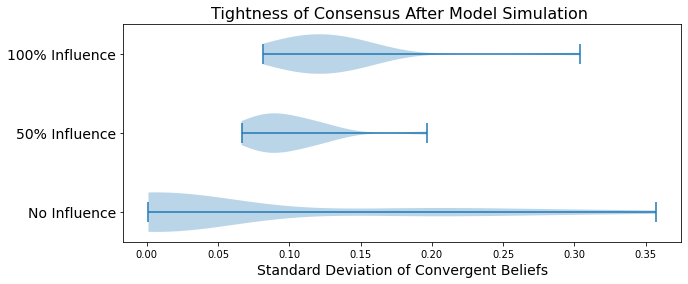

In [15]:
get_violin_plot(n_agents = 100)

# 1000 Agent Model

#### Model parameter selection.  

We start with a grid search on $\alpha$ and $\delta$ to get the desired clustering coefficient and mean in-degree.

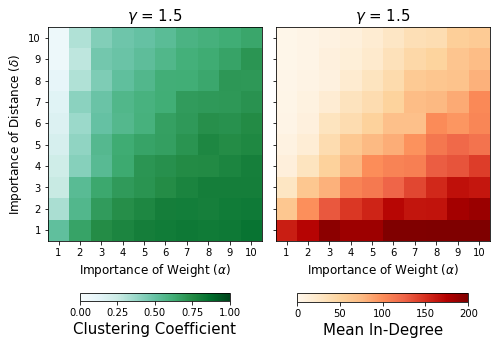

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (7,7), sharey = True)
cc_df = pd.read_csv(f"../data/simulation_results_from_paper/1000_agent_model/grid_search_alpha_delta/15_clustering_coefficient.csv", index_col = 0)

# Add clustering coefficieints
clus = cc_df.values
deltas = list(cc_df.index)
alphas = list(cc_df.columns)
im = ax[0].imshow(clus, cmap = "BuGn", vmin = 0, vmax = 1)

ax[0].set_xticks(np.arange(len(alphas)), labels=alphas)
ax[0].set_yticks(np.arange(len(deltas)), labels=deltas)
ax[0].set_xlabel(r"Importance of Weight ($\alpha$)", fontsize = 12)
ax[0].set_ylabel(r"Importance of Distance ($\delta$)", fontsize = 12)
ax[0].set_title(r"$\gamma$ = 1.5", fontsize = 15)

cmap = plt.get_cmap("BuGn")
norm = plt.Normalize(0, 1)
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[0], 
                    shrink = .7, 
                    orientation = "horizontal", 
                    pad = 0.05,).set_label(label = "Clustering Coefficient",fontsize = 15)

# Add mean in-degree
m_deg = pd.read_csv("paper_plots/1000_agent_model/grid_search_alpha_delta/15_mean_degree.csv", index_col = 0).values
im = ax[1].imshow(m_deg, cmap = "OrRd", vmin = 0, vmax = 200)

ax[1].set_xticks(np.arange(len(alphas)), labels=alphas)
ax[1].set_yticks(np.arange(len(deltas)), labels=deltas)
ax[1].set_xlabel(r"Importance of Weight ($\alpha$)", fontsize = 12)
ax[1].set_title(r"$\gamma$ = 1.5", fontsize = 15)

cmap = plt.get_cmap("OrRd")
norm = plt.Normalize(0, 200)
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[1], 
                    shrink = .8, 
                    orientation = "horizontal", 
                    pad = 0.05,).set_label(label = "Mean In-Degree",fontsize = 15)

fig.tight_layout()
fig.subplots_adjust(top=2.1)

plt.show()

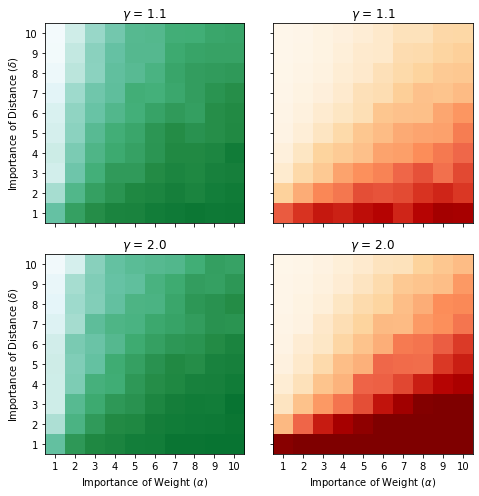

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (7,7), sharey = True, sharex = True)
cc_df = pd.read_csv(f"../data/simulation_results_from_paper/1000_agent_model/grid_search_alpha_delta/11_clustering_coefficient.csv", index_col = 0)

# Add clustering coefficieints
clus = cc_df.values
deltas = list(cc_df.index)
alphas = list(cc_df.columns)
im = ax[0,0].imshow(clus, cmap = "BuGn", vmin = 0, vmax = 1)

ax[0,0].set_xticks(np.arange(len(alphas)), labels=alphas)
ax[0,0].set_yticks(np.arange(len(deltas)), labels=deltas)
ax[0,0].set_ylabel(r"Importance of Distance ($\delta$)")
ax[0,0].set_title(r"$\gamma$ = 1.1")

# Add mean in-degree
m_deg = pd.read_csv(f"../data/simulation_results_from_paper/1000_agent_model/grid_search_alpha_delta/11_mean_degree.csv", index_col = 0).values
im = ax[0,1].imshow(m_deg, cmap = "OrRd", vmin = 0, vmax = 200)

ax[0,1].set_xticks(np.arange(len(alphas)), labels=alphas)
ax[0,1].set_yticks(np.arange(len(deltas)), labels=deltas)
ax[0,1].set_title(r"$\gamma$ = 1.1")

cc_df = pd.read_csv(f"../data/simulation_results_from_paper/1000_agent_model/grid_search_alpha_delta/20_clustering_coefficient.csv", index_col = 0)

# Add clustering coefficieints
clus = cc_df.values
deltas = list(cc_df.index)
alphas = list(cc_df.columns)
im = ax[1,0].imshow(clus, cmap = "BuGn", vmin = 0, vmax = 1)

ax[1,0].set_xticks(np.arange(len(alphas)), labels=alphas)
ax[1,0].set_yticks(np.arange(len(deltas)), labels=deltas)
ax[1,0].set_xlabel(r"Importance of Weight ($\alpha$)")
ax[1,0].set_ylabel(r"Importance of Distance ($\delta$)")
ax[1,0].set_title(r"$\gamma$ = 2.0")

# Add mean in-degree
m_deg = pd.read_csv(f"../data/simulation_results_from_paper/1000_agent_model/grid_search_alpha_delta/20_mean_degree.csv", index_col = 0).values
im = ax[1,1].imshow(m_deg, cmap = "OrRd", vmin = 0, vmax = 200)

ax[1,1].set_xticks(np.arange(len(alphas)), labels=alphas)
ax[1,1].set_yticks(np.arange(len(deltas)), labels=deltas)
ax[1,1].set_xlabel(r"Importance of Weight ($\alpha$)")
ax[1,1].set_title(r"$\gamma$ = 2.0")

plt.tight_layout()
plt.show()

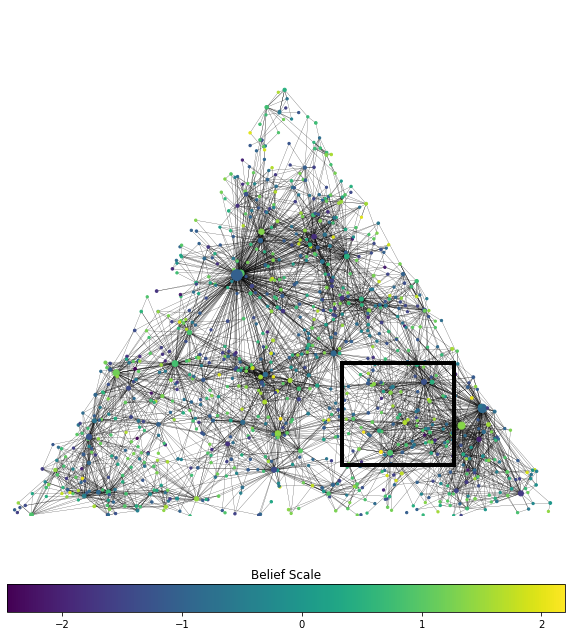

In [18]:
fig, ax = plt.subplots(figsize = (10,12.5))
belief_df = pd.read_csv("../data/simulation_results_from_paper/1000_agent_model/initialized_triangle_for_inset_plot/belief_df.csv", index_col = 0)
adjacency_df = pd.read_csv("../data/simulation_results_from_paper/1000_agent_model/initialized_triangle_for_inset_plot/adjacency_df.csv", index_col = 0)
adjacency_df.rename(columns = {c:int(c) for c in adjacency_df.columns}, inplace = True)
x = belief_df["x"]
y = belief_df["y"]
size = (belief_df["weight"] + 4)
color = belief_df["belief"]
ax.scatter(x,y,c = color, s = size, cmap = "viridis")

# Draw edges
for j in belief_df.index:
    for k in adjacency_df.loc[j,:][adjacency_df.loc[j,:] == 1].index:
        ax.plot((belief_df.loc[j,"x"], belief_df.loc[k,"x"]),
                        (belief_df.loc[j,"y"], belief_df.loc[int(k),"y"]),                            
                        color = "k", lw = .2, zorder = 0)
            
x1 = 600
x2 = 800
y1 = 100
y2 = 300
ax.add_patch(Rectangle((x1, y1), x2-x1, y2-y1,
                            edgecolor = "k", facecolor = "none", lw = 4))

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(belief_df["belief"].min(), belief_df["belief"].max())
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, 
                    orientation = "horizontal",
                   pad = 0.1)
cbar.ax.set_title("Belief Scale")

ax.set_axis_off()
plt.show()

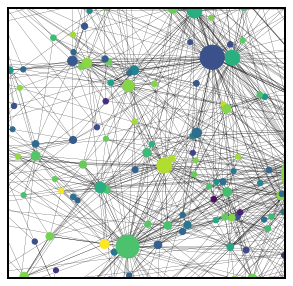

In [19]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(x,y,c = color, s = size ** 2, cmap = "viridis")

# Draw edges
for j in belief_df.index:
    for k in adjacency_df.loc[j,:][adjacency_df.loc[j,:] == 1].index:
        ax.plot((belief_df.loc[j,"x"], belief_df.loc[k,"x"]),
                        (belief_df.loc[j,"y"], belief_df.loc[int(k),"y"]),                            
                        color = "k", lw = .2, zorder = 0)
            
ax.add_patch(Rectangle((x1, y1), x2-x1, y2-y1,
                            edgecolor = "k", facecolor = "none", lw = 4))
            
ax.set_xlim(x1,x2)
ax.set_ylim(y1,y2)

ax.set_axis_off()
plt.show()

#### Run Dynamic Simulations

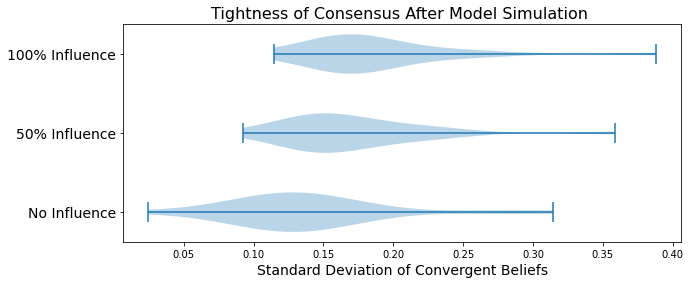

In [20]:
get_violin_plot(n_agents = 1000)

In [21]:
df_stats = pd.read_csv("../data/simulation_results_from_paper/1000_agent_model/full_model_stats_df.csv", index_col = 0)

cc_mean = np.around(df_stats["cc"].mean(), decimals = 2)
cc_std = np.around(df_stats["cc"].std(), decimals = 2)

print(f"Clustering Coefficient = {cc_mean} +/- {cc_std}")

md_mean = np.around(df_stats["md"].mean(), decimals = 2)
md_std = np.around(df_stats["md"].std(), decimals = 2)

print(f"Mean In-Degree = {md_mean} +/- {md_std}")

Clustering Coefficient = 0.33 +/- 0.03
Mean In-Degree = 5.5 +/- 0.62


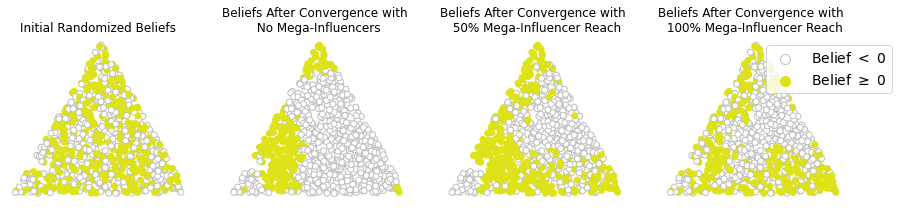

In [22]:
folder = "../data/simulation_results_from_paper/1000_agent_model"
i = 1
belief_df = pd.read_csv(f"{folder}/model_initialization/iteration_{i:03}_belief_df.csv", index_col = 0)

x = belief_df["x"]
y = belief_df["y"]

c = belief_df["belief"]
fig, ax = plt.subplots(1,4,figsize = (15,3))
c = ["white" if belief_df.loc[i,"belief"] < 0 else "#DDE318" for i in belief_df.index ]
e = ["silver" if belief_df.loc[i,"belief"] < 0 else "#DDE318" for i in belief_df.index ]
ax[0].scatter(x,y,facecolor = c, edgecolor = e)
ax[0].set_axis_off()
ax[0].set_title("Initial Randomized Beliefs")

df = pd.read_csv(f"{folder}/full_model_simulation/iteration_{i:03}_reach_000_dynamic_belief_df.csv", index_col = 0)
c = ["white" if df.iloc[i,-1] < 0 else "#DDE318" for i in df.index ]
e = ["silver" if df.iloc[i,-1] < 0 else "#DDE318" for i in df.index ]
ax[1].scatter(x,y,facecolor = c, edgecolor = e)
ax[1].set_axis_off()
ax[1].set_title("Beliefs After Convergence with \n No Mega-Influencers")

df = pd.read_csv(f"{folder}/full_model_simulation/iteration_{i:03}_reach_050_dynamic_belief_df.csv", index_col = 0)
c = ["white" if df.iloc[i,-1] < 0 else "#DDE318" for i in df.index ]
e = ["silver" if df.iloc[i,-1] < 0 else "#DDE318" for i in df.index ]
ax[2].scatter(x,y,facecolor = c, edgecolor = e)
ax[2].set_axis_off()
ax[2].set_title("Beliefs After Convergence with \n 50% Mega-Influencer Reach", fontsize = 12)

df = pd.read_csv(f"{folder}/full_model_simulation/iteration_{i:03}_reach_100_dynamic_belief_df.csv", index_col = 0)
c = ["white" if df.iloc[i,-1] < 0 else "#DDE318" for i in df.index ]
e = ["silver" if df.iloc[i,-1] < 0 else "#DDE318" for i in df.index ]
ax[3].scatter(x,y,facecolor = c, edgecolor = e)
ax[3].set_axis_off()
ax[3].set_title("Beliefs After Convergence with \n 100% Mega-Influencer Reach", fontsize = 12)

ax[3].scatter([],[], facecolor = "white",edgecolor = "silver", label = r"Belief $<$ 0", s = 100)
ax[3].scatter([],[], color = "#DDE318", label = r"Belief $\geq$ 0", s = 100)

ax[3].legend(loc = "upper right",bbox_to_anchor=(1.3, 1), fontsize = 14)

plt.savefig("paper_plots/geospatial_plot.png")
plt.show()

In [23]:
def make_simulation_plot(ax, reach):
    folder = "../data/simulation_results_from_paper/1000_agent_model"
    i = 1
    df = pd.read_csv(f"{folder}/full_model_simulation/iteration_{i:03}_reach_{reach:03}_dynamic_belief_df.csv", index_col = 0)

    m = df.iloc[:,0].min()
    M = df.iloc[:,0].max()
    cmap_linspace = np.linspace(m, M, 100)
    colors = plt.cm.viridis(cmap_linspace)
    hfont = {'fontname':'DejaVu Sans'}

    for i in df.index:
        c = np.where(cmap_linspace <= df.iloc[i,0])[0][-1]
        ax.plot(df.loc[i,:], color = colors[c])
        ax.set_xlabel("Belief")
        ax.set_xlabel("Timesteps", fontsize = 12)
    if reach == 0:
        r = "No"
    else:
        r = f"{reach}%"
    ax.set_xticks([5*i for i in range(4)])
    ax.set_title(f"{r} Reach",fontsize = 18, **hfont)
    r = r.strip("%")   
    return ax

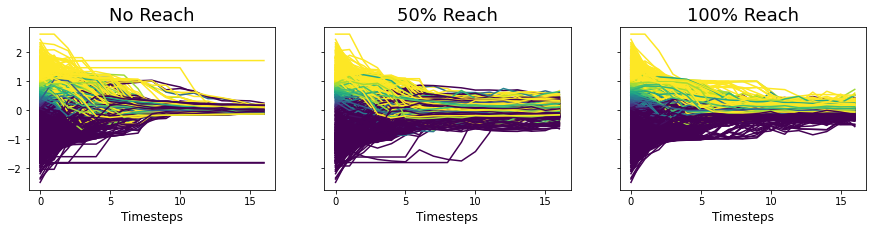

In [24]:
fig, ax = plt.subplots(1,3, figsize = (15,3), sharey = True)

make_simulation_plot(ax = ax[0], reach = 0)
make_simulation_plot(ax = ax[1], reach = 50)
make_simulation_plot(ax = ax[2], reach = 100)
plt.show()

# 